## Binary classification : Cats and Dogs

In [ ]:
### this is the binary classification for the cats and dog images
### here I am just gonna preprocess the raw images and then
### use the CNN model to make the predictions
### later on in other file, I will do the reverse engineering to check for more details

### loading the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img

### loading and preprocessing the images : Train

In [2]:
basedir = '../data/raw/train'
target_size = (224, 224)
X, y = [], []
class_labels = {'cats' : 0, 'dogs' : 1}

In [4]:
for class_name in os.listdir(basedir) : 
    class_path = os.path.join(basedir, class_name)

    if not os.listdir(basedir) : 
        continue

    print(f"loading the images : {class_name}")

    for class_images in os.listdir(class_path) : 
        image_path = os.path.join(class_path, class_images)

        try : 
            load_images = load_img(image_path, target_size = target_size)
            load_images = img_to_array(load_images) / 255.0

            X.append(load_images)
            y.append(class_labels[class_name])

        except Exception as e : 
            print(f"error loading the image : {image_path}, {e}")

loading the images : cats
loading the images : dogs


In [7]:
X = np.array(X)
y = np.array(y)

In [8]:
print(f"{X.shape} : {y.shape}")

(557, 224, 224, 3) : (557,)


In [9]:
X = np.save('../data/preprocessed/X_train.npy', X)
y = np.save('../data/preprocessed/y_train.npy', y)

### loading and preprocessing the images : Test

In [2]:
basedir_test = '../data/raw/test'
target_size = (224, 224)
X, y = [], []
class_labels = {'cats' : 0, 'dogs' : 1}

In [4]:
for class_name in os.listdir(basedir_test) : 
    class_path = os.path.join(basedir_test, class_name)

    if not os.listdir(basedir_test) : 
        continue

    print(f"loading the images : {class_name}")

    for class_images in os.listdir(class_path) : 
        images_path = os.path.join(class_path, class_images)

        try : 
            load_images = load_img(images_path, target_size = target_size)
            load_images = img_to_array(load_images) / 255.0

            X.append(load_images)
            y.append(class_labels[class_name])

        except Exception as e : 
            print(f"error loading the image : {images_path}, {e}")

loading the images : cats
loading the images : dogs


In [6]:
X = np.array(X)
y = np.array(y)

In [7]:
print(f"{X.shape} :: {y.shape}")

(140, 224, 224, 3) :: (140,)


In [8]:
X = np.save('../data/preprocessed/X_test.npy', X)
y = np.save('../data/preprocessed/y_test.npy', y)

### loading the data

In [2]:
X_train = np.load('../data/preprocessed/X_train.npy')
y_train = np.load('../data/preprocessed/y_train.npy')

In [3]:
X_test = np.load('../data/preprocessed/X_test.npy')
y_test = np.load('../data/preprocessed/y_test.npy')

In [4]:
print(f"{X_train.shape}: {y_train.shape} :: {X_test.shape} : {y_test.shape}")

(557, 224, 224, 3): (557,) :: (140, 224, 224, 3) : (140,)


### Randomizing the data

In [5]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state = 42)
X_test, y_test = shuffle(X_test, y_test, random_state = 42)

### constructing the CNN model

In [6]:
model = Sequential()

In [7]:
model = Sequential([
    Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = (224, 224, 3)),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(128, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(128, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(128, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

c:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,730,369 (10.42 MB)

 Trainable params: 2,730,369 (10.42 MB)

 Non-trainable params: 0 (0.00 B)

### training the model and the predictions

In [9]:
model.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_split = 0.10)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5062 - loss: 0.8018 - val_accuracy: 0.5179 - val_loss: 0.6926
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5411 - loss: 0.6927 - val_accuracy: 0.5536 - val_loss: 0.6914
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5549 - loss: 0.6926 - val_accuracy: 0.4821 - val_loss: 0.6937
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4995 - loss: 0.6918 - val_accuracy: 0.5179 - val_loss: 0.6897
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5934 - loss: 0.6821 - val_accuracy: 0.6429 - val_loss: 0.6863
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5655 - loss: 0.6877 - val_accuracy: 0.6607 - val_loss: 0.6816
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6625 - loss: 0.6537 - val_accuracy: 0.6071 - val_loss: 0.6668
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6590 - loss: 0.5989 - val_accuracy: 0.6429 - val_loss:

In [10]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step


In [11]:
y_pred = (y_pred > 0.5).astype(int)
y_pred = y_pred.flatten()

In [12]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1])

### performance report

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
def metrices(y_test, y_pred) : 
    print(f"Accuracy score : {accuracy_score(y_test, y_pred)}")
    print(f"Confusion matrix : ")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [14]:
def plot_graphs(y_test, y_pred, y_prob = None) : 

    metrices(y_test, y_pred)

    plt.figure(figsize = (10, 6))
    plt.subplot(1, 2, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    
    # --- 2️⃣ ROC Curve (only for binary classification) ---
    if y_prob is not None and len(set(y_test)) == 2:
        plt.subplot(1, 2, 2)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
    else:
        plt.subplot(1, 2, 2)
        sns.histplot(y_pred, color='purple', bins=len(set(y_pred)))
        plt.title('Predicted Class Distribution')
        plt.xlabel('Predicted Class')
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

Accuracy score : 0.6357142857142857
Confusion matrix : 
[[52 18]
 [33 37]]
              precision    recall  f1-score   support

           0       0.61      0.74      0.67        70
           1       0.67      0.53      0.59        70

    accuracy                           0.64       140
   macro avg       0.64      0.64      0.63       140
weighted avg       0.64      0.64      0.63       140



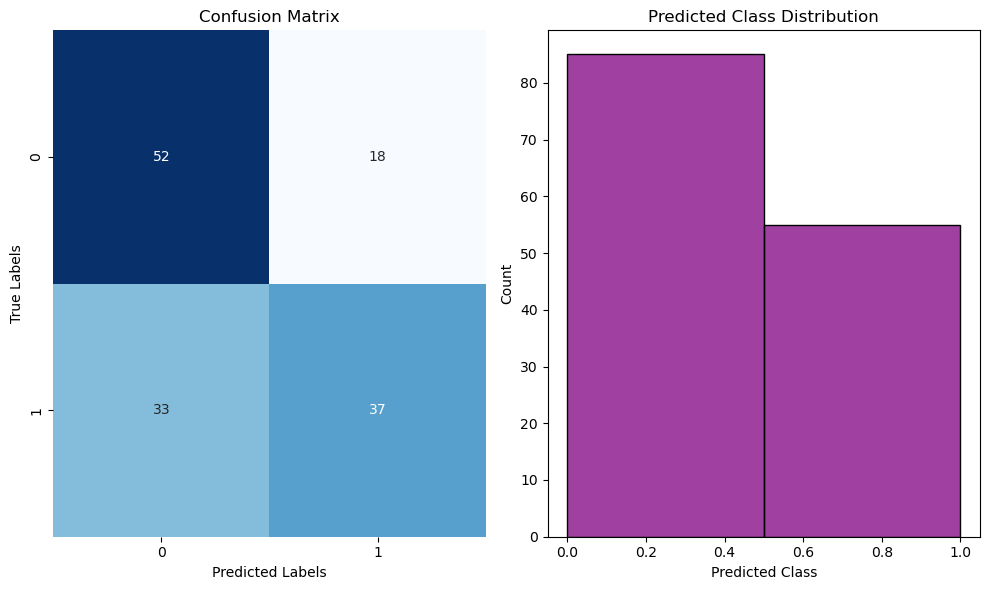

In [15]:
plot_graphs(y_test, y_pred)

### saving the model

In [16]:
model.save('../models/binary_class_model.h5')